In [42]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from datapreprosessing import *


In [24]:
audio_dir='fma_small'

feature_extraction_test = extract_features('fma_small/000/000002.mp3')

filepath = 'fma_small/fma_metadata/tracks.csv'
tracks = load_tracks(filepath)
fma_small = tracks[tracks['set', 'subset'] == 'small']

# Print the shape of the small subset
print(fma_small.shape)

(8000, 52)


In [49]:
# Load X and y from the saved .npy files

XX = np.load('X_medium.npy', allow_pickle=True)
yy = np.load('y_medium.npy', allow_pickle=True)
np.nan_to_num(XX,0)


array([[ 7.23267436e-01,  9.76336300e-02,  3.12463820e-01, ...,
        -3.40898895e+01, -1.90405730e-01,  7.56735291e-02],
       [ 4.27478582e-01,  9.25289914e-02,  3.04185778e-01, ...,
        -2.65414467e+01,  3.31592578e-02, -1.66823928e-01],
       [ 5.37877202e-01,  8.07771459e-02,  2.84213215e-01, ...,
        -3.02505894e+01,  1.13161338e-01,  2.41499572e-01],
       ...,
       [ 3.03386003e-01,  6.09684065e-02,  2.46917814e-01, ...,
        -1.99380951e+01, -1.42457879e-01, -1.40062005e-01],
       [ 6.37709737e-01,  9.93302912e-02,  3.15167099e-01, ...,
        -3.25693130e+01,  1.16358214e-01,  4.11841093e-01],
       [ 4.59266275e-01,  4.83287238e-02,  2.19837949e-01, ...,
        -2.27927513e+01, -3.25676319e-02,  2.73381908e-01]])

In [50]:


# (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2, random_state=42, stratify=yy)

# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



X_train shape: (19984, 328), y_train shape: (19984,)
X_test shape: (4996, 328), y_test shape: (4996,)


In [51]:


clf = RandomForestClassifier(n_estimators=500, min_samples_split=5, min_samples_leaf=1, bootstrap=True)

scores = cross_val_score(clf, X_train, y_train)
print(f"Cross-validation accuracy: {scores.mean():.4f}")
#Best parameters found: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
clf.fit(X_train, y_train)


Cross-validation accuracy: 0.6098


RandomForestClassifier(min_samples_split=5, n_estimators=500)

In [52]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 61.15%
Classification Report:
                     precision    recall  f1-score   support

              Blues       0.00      0.00      0.00        15
          Classical       0.70      0.69      0.69       124
            Country       0.00      0.00      0.00        35
     Easy Listening       0.00      0.00      0.00         4
         Electronic       0.55      0.82      0.65      1262
       Experimental       0.48      0.23      0.31       450
               Folk       0.59      0.55      0.57       304
            Hip-Hop       0.79      0.45      0.57       438
       Instrumental       0.47      0.37      0.41       270
      International       0.69      0.28      0.40       204
               Jazz       1.00      0.05      0.10        77
Old-Time / Historic       0.89      0.98      0.93       102
                Pop       1.00      0.01      0.03       237
               Rock       0.66      0.84      0.74      1419
           Soul-RnB       0.00      0.00    

C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

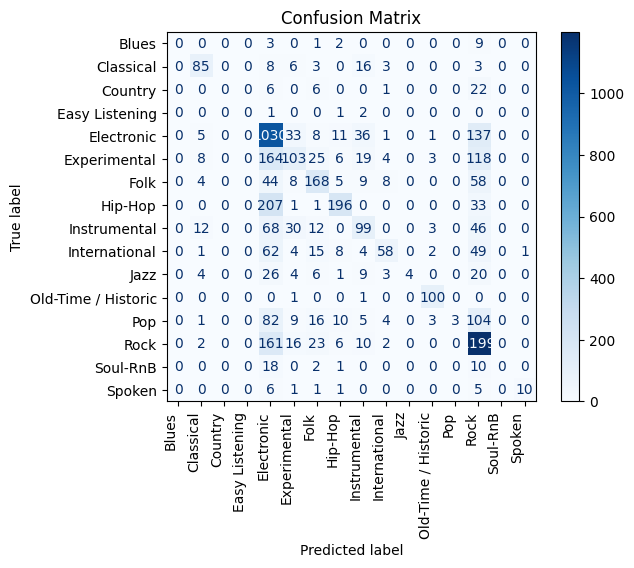

In [53]:


conf_matrix = confusion_matrix(y_test, y_pred)

class_names = ['Blues', 'Classical', 'Country', 'Easy Listening', 'Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Jazz', 'Old-Time / Historic', 'Pop', 'Rock', 'Soul-RnB', 'Spoken' ]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)

disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90, ha='right')
plt.title("Confusion Matrix")
plt.show()


In [54]:
from joblib import dump
# Save model
dump(clf, 'models/rf_medium_model.joblib')

['models/rf_medium_model.joblib']

In [55]:
def classify_genre(audio_path):
    
    features = extract_features(audio_path) 
    features = features.reshape(1, -1)
    genre= clf.predict(features)[0]
    return genre

d = classify_genre('fma_small/000/000002.mp3')
print(d)

Hip-Hop
